In [1]:
import pandas as pd 
import scipy.io
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("UK food consumption.xlsx",index_col=0)
display(df)

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209
Sugars,156,175,147,139
Fresh potatoes,720,874,566,1033
Fresh Veg,253,265,171,143
Other Veg,488,570,418,355
Processed potatoes,198,203,220,187


## Food

(17, 4)
Z : (17, 4)
U : (17, 17),  S : (4,), Vt : (4, 4)


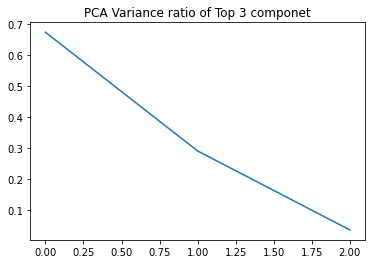

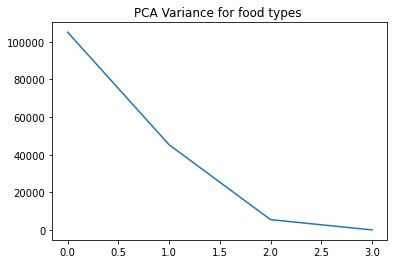

In [31]:
X = df.to_numpy()
print(X.shape)
m,n = X.shape # m x n matrix

# normalization
mean_x = X.mean(axis=1)
X = np.subtract(X, np.repeat(np.reshape(mean_x,(m,1)),repeats=n, axis=1))
Z = 1/np.sqrt(n-1)*X
print("Z : {}".format(Z.shape))


[U,S,Vt] = np.linalg.svd(Z,full_matrices=True, compute_uv=True,hermitian=False)
print("U : {},  S : {}, Vt : {}".format(U.shape,S.shape,Vt.shape))

# Variance
Var= S*S

total_variance = np.sum(Var)

plt.figure()
plt.title("PCA Variance ratio of Top 3 componet")
plt.plot(Var[:3]/total_variance)



## Covariance : Food type

(17, 4)
Z : (17, 4)
(17, 17)
U : (17, 17),  S : (17,), Vt : (17, 17)
(17,)


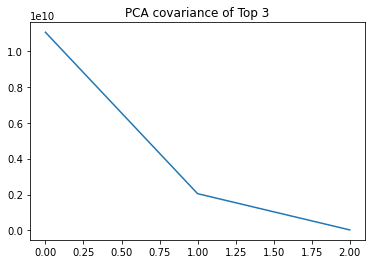

In [24]:
X = df.to_numpy()
print(X.shape)
m,n = X.shape # m x n matrix

# normalization
mean_x = X.mean(axis=1)
X = np.subtract(X, np.repeat(np.reshape(mean_x,(m,1)),repeats=n, axis=1))
Z = 1/np.sqrt(n-1)*X
print("Z : {}".format(Z.shape))

Cx = np.matmul(Z,Z.T)
print(Cx.shape)

[U,S,Vt] = np.linalg.svd(Cx,full_matrices=True, compute_uv=True,hermitian=False)
print("U : {},  S : {}, Vt : {}".format(U.shape,S.shape,Vt.shape))

# Hadamard product
Var= S*S
print(Var.shape)

plt.figure()
plt.title("PCA covariance of Top 3")
plt.plot(Var[:3])

(4, 17)
Z : (4, 17)
(4, 4)
U : (4, 4),  S : (4,), Vt : (4, 4)
(4,)


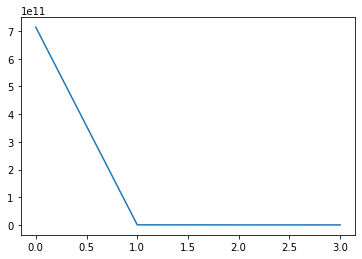

In [20]:
X = df.to_numpy()
X = X.T
print(X.shape)
m,n = X.shape # m x n matrix

# normalization
mean_x = X.mean(axis=1)
X = np.subtract(X, np.repeat(np.reshape(mean_x,(m,1)),repeats=n, axis=1))
Z = 1/np.sqrt(n-1)*X
print("Z : {}".format(Z.shape))

Cx = np.matmul(Z,Z.T)
print(Cx.shape)

[U,S,Vt] = np.linalg.svd(Cx,full_matrices=True, compute_uv=True,hermitian=False)
print("U : {},  S : {}, Vt : {}".format(U.shape,S.shape,Vt.shape))

# Hadamard product
Var= S*S
print(Var.shape)

plt.figure()
plt.plot(Var)